In [2]:
import json
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

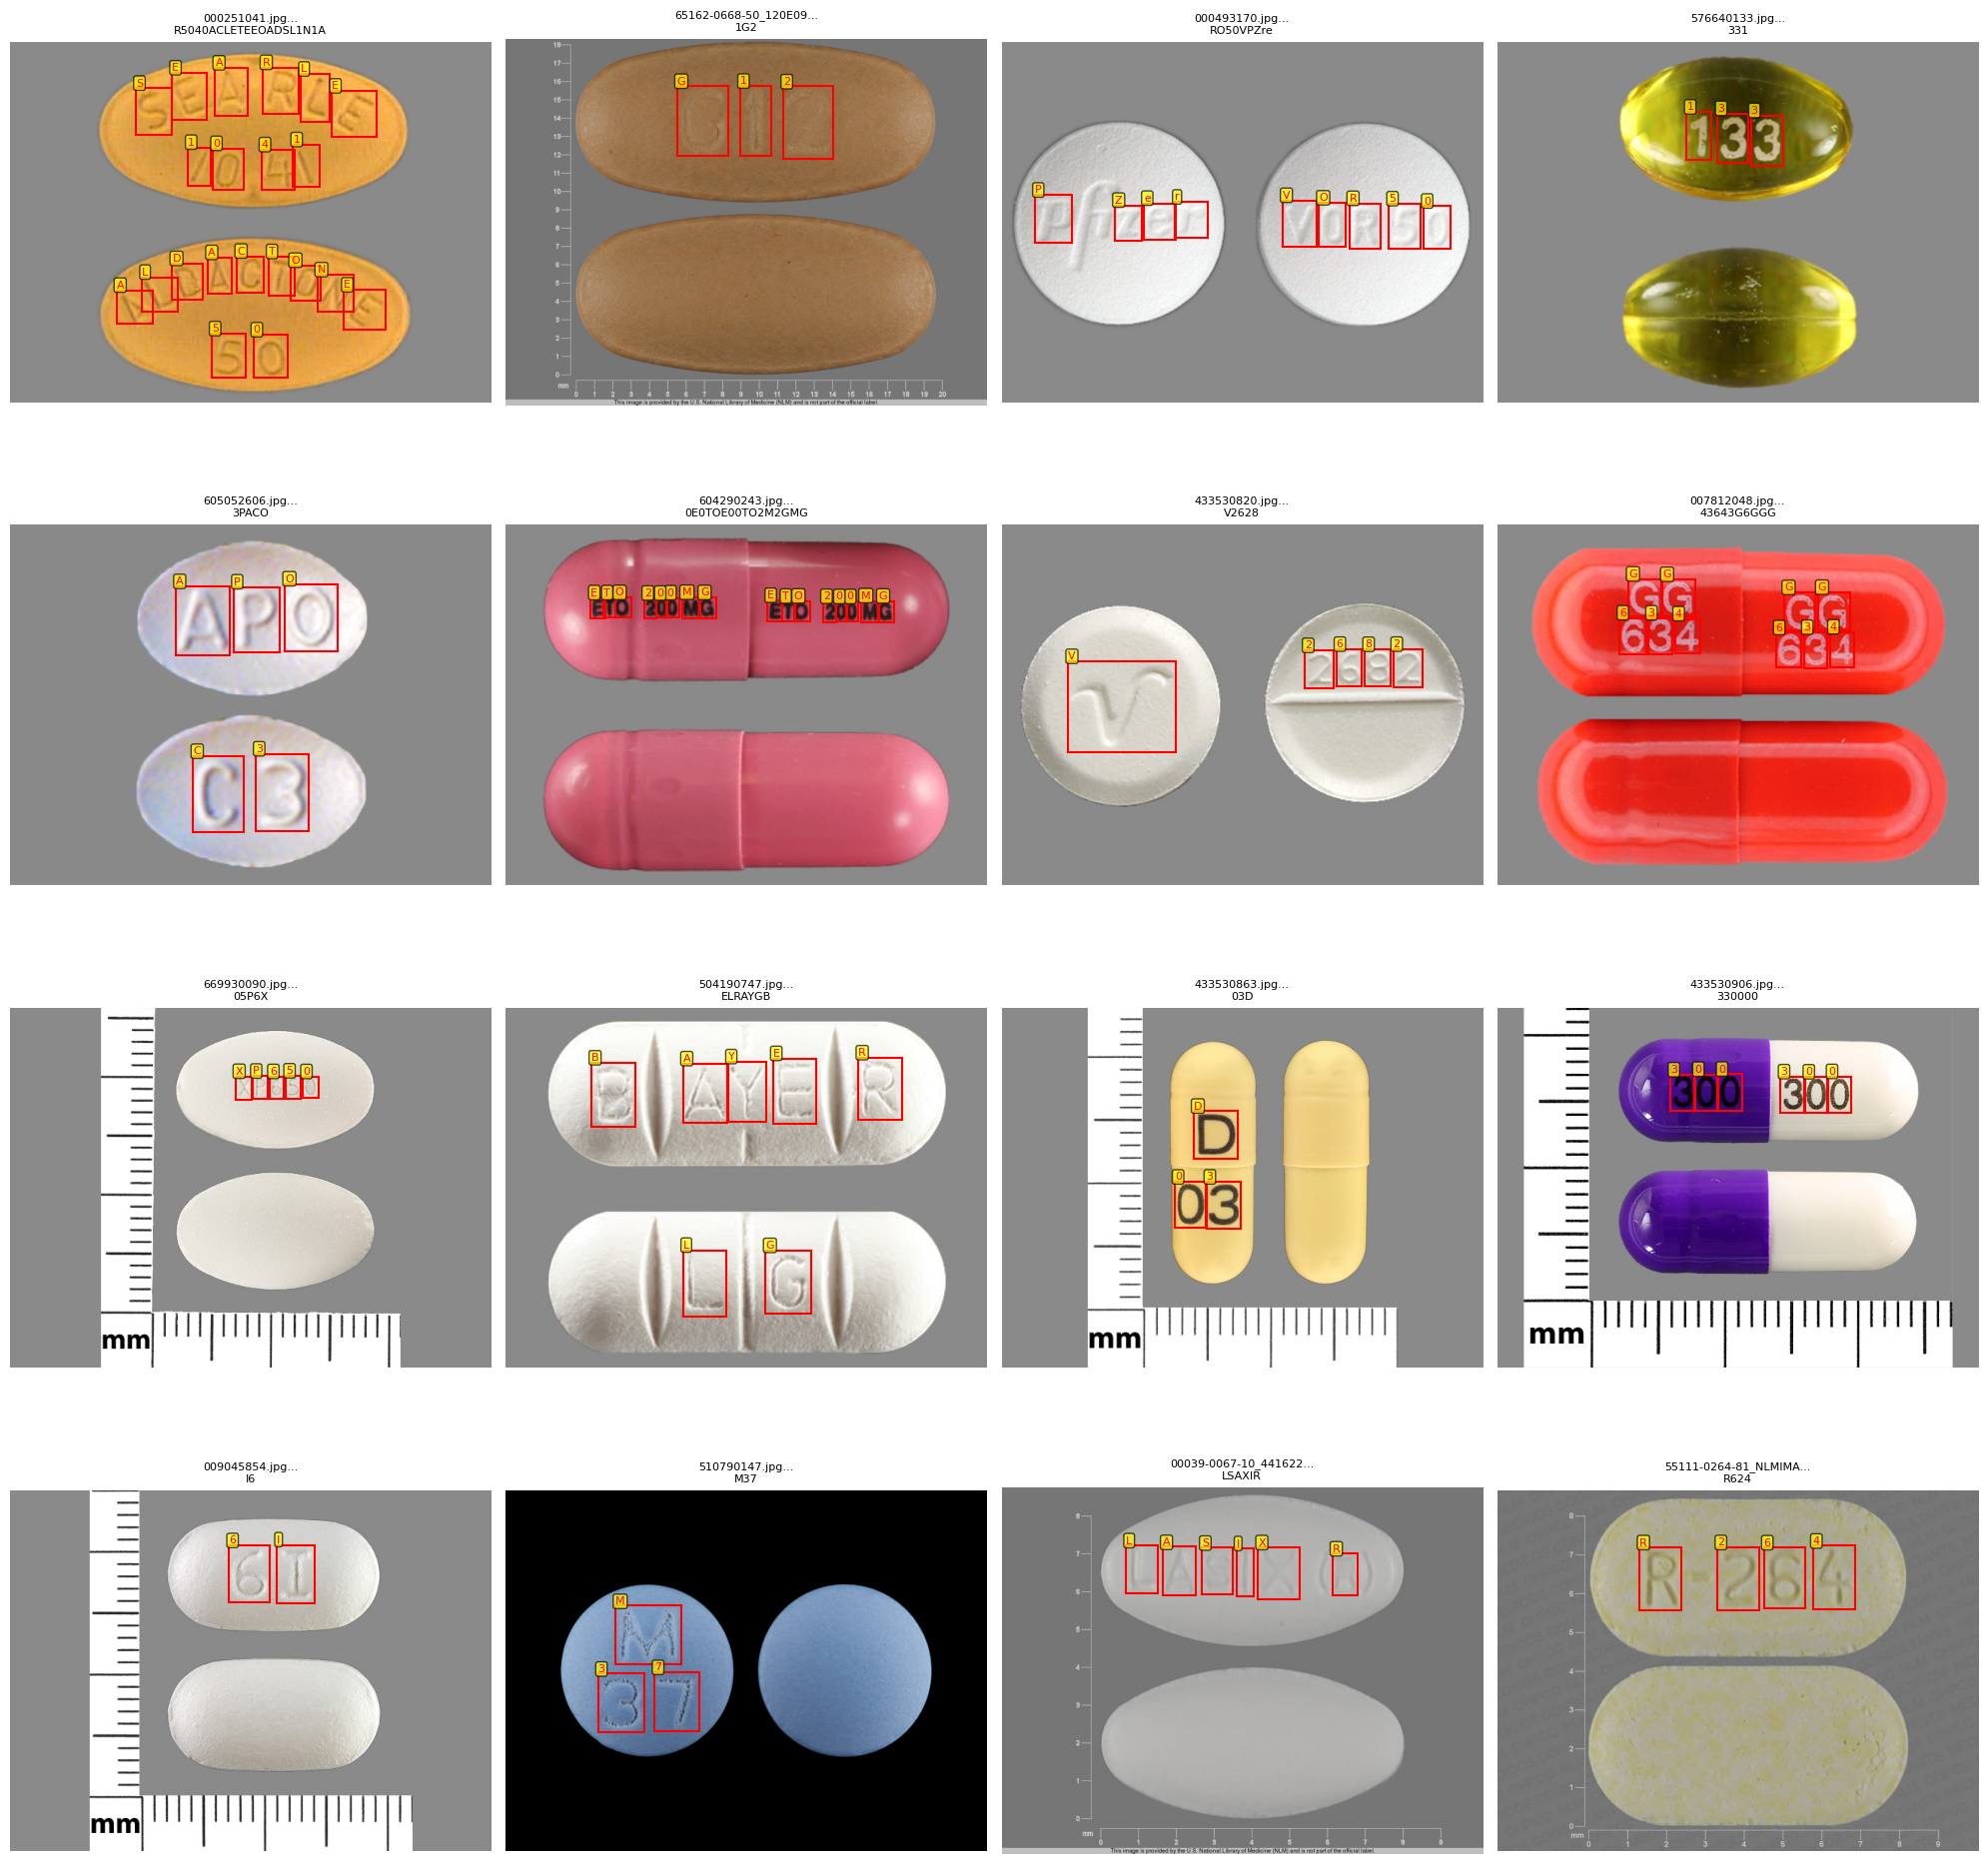

In [18]:
# Load the labels
with open('labels_final/imprint_labels_batch_3_800.json', 'r') as f:
    labels_data = json.load(f)

# Randomly choose 16 labeled images for 4x4 grid
num_samples = min(16, len(labels_data))  # In case there are fewer than 16 images
random_samples = random.sample(labels_data, num_samples)

# Create 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for idx, sample in enumerate(random_samples):
    ax = axes[idx]
    image_name = sample['image']
    labels = sample['labels']
    
    # Load the image
    image_path = os.path.join('../data/pillbox_production_images_full_202008', image_name)
    try:
        img = Image.open(image_path)
        img_width, img_height = img.size
        
        ax.imshow(img)
        
        # Draw bounding boxes for each label
        for label_info in labels:
            label_text = label_info['label']
            coords = label_info['coords'].split()
            
            # Convert normalized coordinates (center_x, center_y, width, height) to pixel coordinates
            center_x = float(coords[0]) * img_width
            center_y = float(coords[1]) * img_height
            box_width = float(coords[2]) * img_width
            box_height = float(coords[3]) * img_height
            
            # Convert to top-left corner coordinates
            x = center_x - box_width / 2
            y = center_y - box_height / 2
            
            # Create rectangle patch
            rect = patches.Rectangle((x, y), box_width, box_height,
                                    linewidth=1.5, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            
            # Add label text
            ax.text(x, y - 3, label_text, color='red', fontsize=8, 
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))
        
        # Set title with image name and label count
        label_text_str = ''.join([l['label'] for l in labels])
        ax.set_title(f"{image_name[:20]}...\n{label_text_str}", fontsize=8)
        ax.axis('off')
        
    except FileNotFoundError:
        ax.text(0.5, 0.5, f'Image not found:\n{image_name}', 
                ha='center', va='center', fontsize=8)
        ax.axis('off')

# Hide any unused subplots
for idx in range(num_samples, 16):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [19]:
# Check for duplicate images in the labels data
image_names = [item['image'] for item in labels_data]
unique_images = set(image_names)

print(f"Total labeled images: {len(image_names)}")
print(f"Unique images: {len(unique_images)}")
print(f"Duplicates found: {len(image_names) - len(unique_images)}")

if len(image_names) != len(unique_images):
    print("\nDuplicate images:")
    from collections import Counter
    image_counts = Counter(image_names)
    duplicates = {img: count for img, count in image_counts.items() if count > 1}
    for img, count in duplicates.items():
        print(f"  {img}: appears {count} times")
else:
    print("\nNo duplicates found - all images are unique!")

Total labeled images: 797
Unique images: 797
Duplicates found: 0

No duplicates found - all images are unique!


# Invalid images

Showing 3 images from indices: [138, 415, 586]


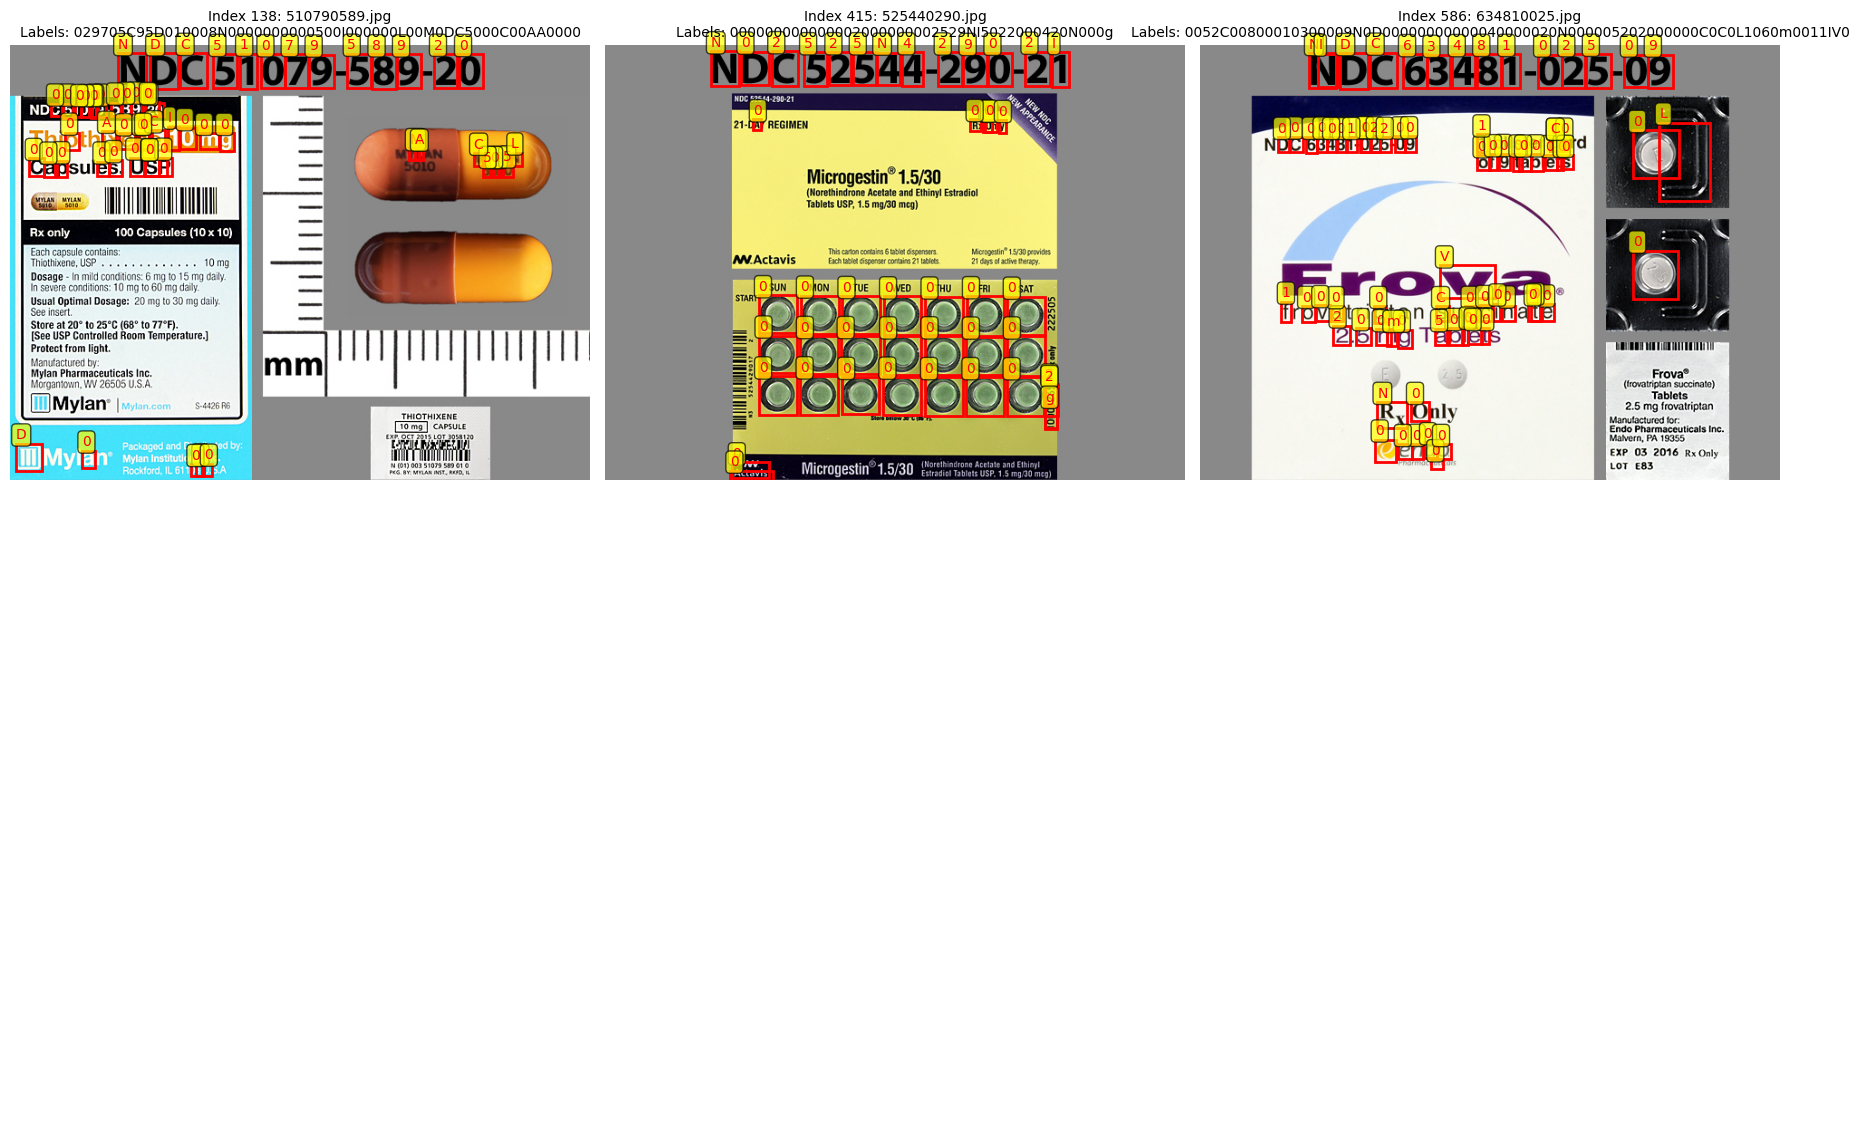

In [ ]:
# Show specific images by index
indices = [138, 415, 586]

# Filter valid indices
valid_indices = [idx for idx in indices if idx < len(labels_data)]
num_samples = len(valid_indices)

print(f"Showing {num_samples} images from indices: {valid_indices}")
if len(valid_indices) < len(indices):
    print(f"Warning: Some indices are out of range. Total images available: {len(labels_data)}")

# Create grid layout (adjust based on number of valid images)
if num_samples == 0:
    print("No valid indices to display")
else:
    # Create a 2x3 grid or adjust based on number of images
    nrows = 2
    ncols = 3
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 12))
    axes = axes.flatten()
    
    for plot_idx, data_idx in enumerate(valid_indices):
        ax = axes[plot_idx]
        sample = labels_data[data_idx]
        image_name = sample['image']
        labels = sample['labels']
        
        # Load the image
        image_path = os.path.join('../data/pillbox_production_images_full_202008', image_name)
        try:
            img = Image.open(image_path)
            img_width, img_height = img.size
            
            ax.imshow(img)
            
            # Draw bounding boxes for each label
            for label_info in labels:
                label_text = label_info['label']
                coords = label_info['coords'].split()
                
                # Convert normalized coordinates to pixel coordinates
                center_x = float(coords[0]) * img_width
                center_y = float(coords[1]) * img_height
                box_width = float(coords[2]) * img_width
                box_height = float(coords[3]) * img_height
                
                # Convert to top-left corner coordinates
                x = center_x - box_width / 2
                y = center_y - box_height / 2
                
                # Create rectangle patch
                rect = patches.Rectangle((x, y), box_width, box_height,
                                        linewidth=2, edgecolor='red', facecolor='none')
                ax.add_patch(rect)
                
                # Add label text
                ax.text(x, y - 5, label_text, color='red', fontsize=10, 
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
            
            # Set title with index, image name and labels
            label_text_str = ''.join([l['label'] for l in labels])
            ax.set_title(f"Index {data_idx}: {image_name}\nLabels: {label_text_str}", fontsize=10)
            ax.axis('off')
            
        except FileNotFoundError:
            ax.text(0.5, 0.5, f'Image not found:\n{image_name}', 
                    ha='center', va='center', fontsize=10)
            ax.set_title(f"Index {data_idx}: FILE NOT FOUND", fontsize=10)
            ax.axis('off')
    
    # Hide any unused subplots
    for idx in range(num_samples, nrows * ncols):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

In [21]:
# Remove specific indices from the labels and save to new file
indices_to_remove = [138, 415, 586]

# Load the original file
with open('labels_final/imprint_labels_batch_3_800.json', 'r') as f:
    original_labels = json.load(f)

print(f"Original dataset size: {len(original_labels)}")
print(f"Indices to remove: {indices_to_remove}")

# Create new list excluding the specified indices
# We need to remove in reverse order to maintain correct indexing
vetted_labels = [label for idx, label in enumerate(original_labels) if idx not in indices_to_remove]

print(f"New dataset size: {len(vetted_labels)}")
print(f"Removed {len(original_labels) - len(vetted_labels)} entries")

# Save to new file
output_path = 'labels_final/imprint_labels_batch_3_vetted.json'
with open(output_path, 'w') as f:
    json.dump(vetted_labels, f, indent=2)

print(f"\nSaved vetted labels to: {output_path}")

Original dataset size: 797
Indices to remove: [138, 415, 586]
New dataset size: 794
Removed 3 entries

Saved vetted labels to: labels_final/imprint_labels_batch_3_vetted.json
